In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

abalone = pd.read_csv('abalone.data.csv')

In [2]:
abalone.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


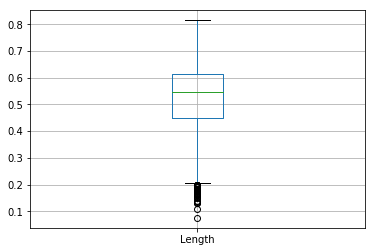

In [3]:
abalone.boxplot('Length')
plt.show()

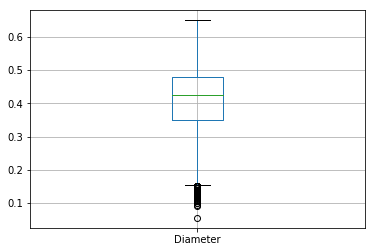

In [4]:
abalone.boxplot('Diameter')
plt.show()

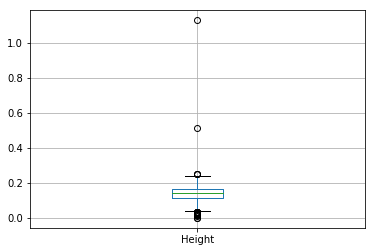

In [5]:
abalone.boxplot('Height')
plt.show()

In [6]:
abalone.shape

(4177, 9)

In [7]:
correlation_matrix = abalone.corr()
display(correlation_matrix)

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [8]:
import sklearn
from sklearn import preprocessing, cross_validation, neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=50)
X = pd.DataFrame(abalone[['Length', 'Diameter', 'Height']])
y = abalone.Shell_weight

knn.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='uniform')

In [9]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=50, weights='distance')
X = pd.DataFrame(abalone[['Length', 'Diameter', 'Height']])
y = abalone.Shell_weight

knn_w.fit(X, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=50, p=2,
          weights='distance')

In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv=9)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, y, cv=9)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.90 (+/- 0.06)
Weighted Accuracy: 0.88 (+/- 0.05)


### OLS

In [11]:
import math

from matplotlib import pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [12]:
X = abalone[['Length', 'Diameter', 'Height']]
y = abalone['Shell_weight'].values.reshape(-1, 1)

# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, y))


Coefficients: 
 [[ 0.14718573  0.85654279  0.67616645]]

Intercept: 
 [-0.28199736]

R-squared:
0.832884370485


In [14]:
correlation_matrix = X.corr()
display(correlation_matrix)

,Length,Diameter,Height
Length,1.000,0.987,0.828
Diameter,0.987,1.000,0.834
Height,0.828,0.834,1.000


In [15]:
# Write out the model formula.
linear_formula = 'Shell_weight ~ Length+Diameter+Height'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=abalone).fit()

In [16]:
lm.params

Intercept   -0.282
Length       0.147
Diameter     0.857
Height       0.676
dtype: float64

In [17]:
lm.pvalues

Intercept   0.000
Length      0.001
Diameter    0.000
Height      0.000
dtype: float64

In [18]:
lm.rsquared

0.83288437048452146

In [19]:
lm.conf_int()

,0,1
Intercept,-0.290,-0.274
Length,0.058,0.236
Diameter,0.747,0.966
Height,0.601,0.751


### Conclusion

Based on these results and the accuracy scores of the KNN model versus the R-squared value of the linear regression model, I would say that the KNN model gets better results in this particular case. The weighted accuracy of the KNN model is 0.88, whereas the R-squared value of the linear regression is 0.83, so it's not a terribly large margin, but enough to see a difference. The standard devation value is also smaller in the KNN model compared to the confidence intervals in the regression model.

Intuitively, the KNN model may be better suited to this dataset because there is a finite limit on the sizes of the values. An abalone will never grow to, say, 20 feet in diameter, so there would be no reason to want a regression model that can include those types of numbers. That is to say, there is a finite upper bound. Additionally, because of genetic variation, it may seem to reason that a KNN model would outperform a linear regression model in general. There will always be outliers due to genetic variation, and a KNN model could better take predict those points since it would have seen values similar in the training data.